
##### O código realiza um agrupamento de dados utilizando o algoritmo K-Means em um conjunto de dados do Facebook. Os dados são pré-processados utilizando a escala Min-Max, e em seguida, o algoritmo K-Means é aplicado para agrupar os pontos de dados em três clusters. Os clusters são visualizados em um gráfico de dispersão, onde os eixos X e Y representam o número de likes e shares, respectivamente. As cores no gráfico indicam a pertinência de cada ponto a um dos três clusters. O título do gráfico é "Agrupamento de Dados do Facebook".


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


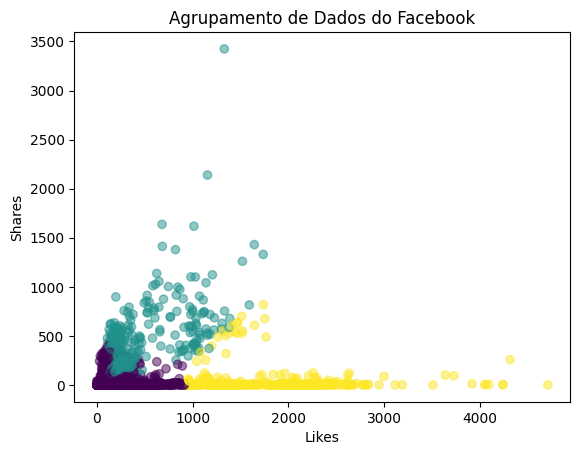

In [1]:
import pandas as pd
from pycaret.datasets import get_data
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data = get_data('facebook')

num = MinMaxScaler()

X = data[['num_likes', 'num_comments', 'num_shares']]

X = num.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

plt.scatter(data['num_likes'], data['num_shares'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Likes')
plt.ylabel('Shares')
plt.title('Agrupamento de Dados do Facebook')
plt.show()


##### A parte do código em questão calcula a média das variáveis 'num_likes', 'num_comments' e 'num_shares' para cada cluster identificado pelo algoritmo K-Means. O resultado é um DataFrame chamado cluster_stats que mostra as médias dessas variáveis para cada cluster. Essas estatísticas resumidas fornecem insights sobre as características médias dos clusters, permitindo uma compreensão mais aprofundada dos padrões de comportamento associados aos grupos identificados pelo algoritmo de agrupamento. Essa análise estatística é útil para interpretar e comparar as diferenças médias entre os clusters formados.

In [2]:
cluster_stats = data.groupby('cluster')[['num_likes', 'num_comments', 'num_shares']].mean()
print(cluster_stats)

           num_likes  num_comments  num_shares
cluster                                       
0         103.051773     92.207248   20.484154
1         511.587121   3549.689394  515.984848
2        1757.628641    138.016990   37.313107
